In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.ticker import MaxNLocator


# Understanding Japan

## 1 - Processing the Japan Bonds


In [8]:
df_bond_jgb = pd.read_csv('../Data/Japan/1_Markets/markets_historical_gjgb10_ind.csv', encoding='utf-16')

df_bond_jgb['Date'] = pd.to_datetime(df_bond_jgb['Date'], format='%d/%m/%Y')
df_bond_jgb.set_index(['Date'], inplace=True)
df_bond_jgb.sort_index(ascending=True)
df_bond_jgb = df_bond_jgb.loc[:,['Symbol', 'Open']]

df_bond_jgb.columns = ['Symbol', 'IR']
df_bond_jgb

,Symbol,IR
Date,,
2023-08-01,GJGB10:IND,0.603
2023-07-31,GJGB10:IND,0.573
2023-07-28,GJGB10:IND,0.516
2023-07-27,GJGB10:IND,0.464
2023-07-26,GJGB10:IND,0.467
...,...,...
1984-03-16,GJGB10:IND,7.300
1984-02-21,GJGB10:IND,7.450
1984-02-15,GJGB10:IND,7.430


## Plotting the Japan Bonds

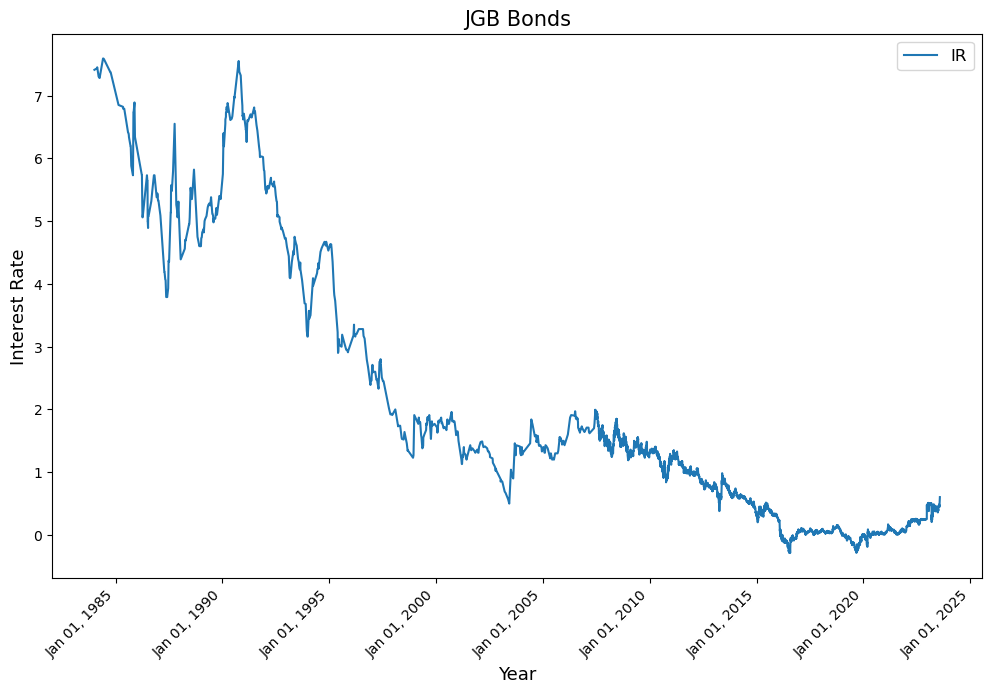

In [9]:
df_bond_jgb.IR.plot(figsize = (12,8))
plt.title("JGB Bonds", fontsize = 15)
plt.legend(loc = 1, fontsize = 12)
plt.xlabel("Year", fontsize = 13)
plt.ylabel("Interest Rate", fontsize = 13)
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %d, %Y'))

## 2 - Processing the JGB IR

In [11]:
df_shares_index_nikkei = pd.read_csv('../Data/Japan/1_Markets/markets_historical_nky_ind.csv', encoding='utf-16')

df_shares_index_nikkei['Date'] = pd.to_datetime(df_shares_index_nikkei['Date'], format='%d/%m/%Y')
df_shares_index_nikkei.set_index(['Date'], inplace=True)
df_shares_index_nikkei.sort_index(ascending=True)

df_shares_index_nikkei = df_shares_index_nikkei.loc[:,['Symbol', 'Open']]

df_shares_index_nikkei.columns = ['Symbol', 'Index']
df_shares_index_nikkei

,Symbol,Index
Date,,
2023-08-01,NKY:IND,33292.31
2023-07-31,NKY:IND,33128.83
2023-07-28,NKY:IND,32444.42
2023-07-27,NKY:IND,32523.69
2023-07-26,NKY:IND,32704.96
...,...,...
1983-06-13,NKY:IND,8598.65
1983-06-10,NKY:IND,8500.48
1983-06-09,NKY:IND,8468.12


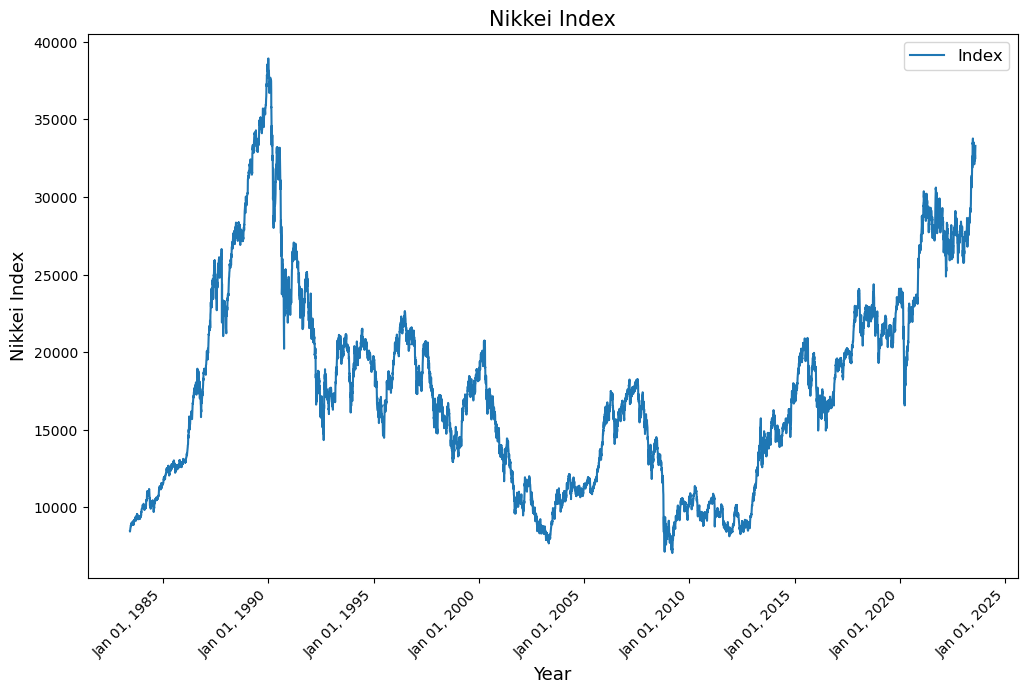

In [16]:
df_shares_index_nikkei.Index.plot(figsize = (12,8))
plt.title("Nikkei Index", fontsize = 15)
plt.legend(loc = 1, fontsize = 12)
plt.xlabel("Year", fontsize = 13)
plt.ylabel("Nikkei Index", fontsize = 13)

plt.xticks(rotation=45)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %d, %Y'))

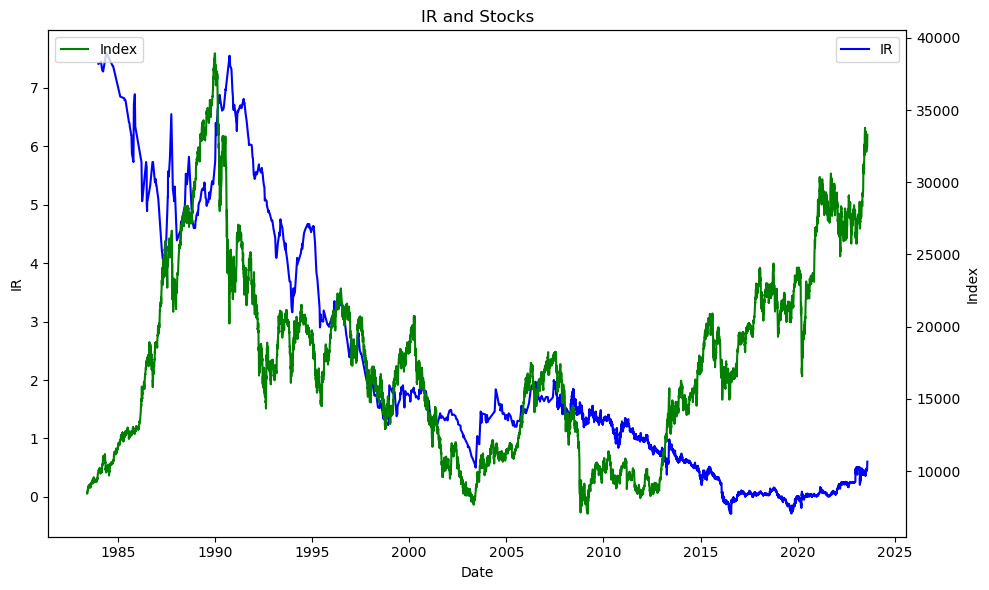

In [30]:
fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.plot(df_bond_jgb.index, df_bond_jgb['IR'], label=f'IR', linestyle='-', color='blue')
ax1.set_xlabel('Date')
ax1.set_ylabel('IR')
ax1.set_title('IR and Stocks')
ax1.legend(loc=1)


# Create a second y-axis sharing the same x-axis
ax2 = ax1.twinx()
ax2.plot(df_shares_index_nikkei.index, df_shares_index_nikkei['Index'], label=f'Index', linestyle='-', color='green')
ax2.set_ylabel('Index')
ax2.legend(loc=2)


# Adjust layout and display the plot
plt.tight_layout()
plt.show()